## Draw point in image

In [2]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

In [3]:
def draw_points(image, points):
    idx = -1
    for pt in points:
        idx += 1
        pt = (int(pt[0]), int(pt[1]))
        cv2.circle(image, pt, 5, (255,0,0), -1)
        cv2.putText(image, str(idx), pt, cv2.FONT_HERSHEY_COMPLEX, 1.0, (0,0,255))
    return image


def draw_landmarks(img, landmark):
    landmark = landmark
    lm_img = np.zeros([img.shape[0], img.shape[1], 3])
    lm_img[:] = img.astype(np.float32)
    landmark = np.round(landmark).astype(np.int32)

    for i in range(len(landmark)):
        for j in range(-1, 1):
            for k in range(-1, 1):
                if img.shape[0] - 1 - landmark[i, 1]+j > 0 and \
                        img.shape[0] - 1 - landmark[i, 1]+j < img.shape[0] and \
                        landmark[i, 0]+k > 0 and \
                        landmark[i, 0]+k < img.shape[1]:
                    lm_img[img.shape[0] - 1 - landmark[i, 1]+j, landmark[i, 0]+k,
                           :] = np.array([0, 0, 255])
    lm_img = lm_img.astype(np.uint8)
    return lm_img

[[ 73.04118529 134.55776818]
 [130.79305837 136.95011541]
 [ 85.0029326  100.72207773]
 [ 75.7763394   73.47265974]
 [134.80461773  77.98748924]] (5, 2)


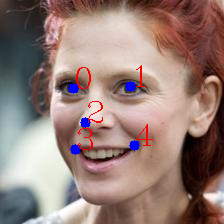

In [7]:
image_path = "/home/zhanghm/Research/StyleGAN/Deep3DFaceRecon_pytorch/temp.jpg"
landmark_path = "/home/zhanghm/Research/StyleGAN/Deep3DFaceRecon_pytorch/temp.txt"

img_src = cv2.imread(image_path)
# display(Image.fromarray(img_src[..., ::-1]))

landmarks = np.loadtxt(landmark_path)
print(landmarks, landmarks.shape)

landmarks[:, -1] = 224 - 1 - landmarks[:, -1]
draw_points(img_src, landmarks)

# img_src = draw_landmarks(img_src, landmarks)


display(Image.fromarray(img_src[..., ::-1]))


## Draw landmarks in image

0.4375 512


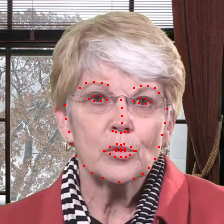

In [11]:
img_path = "/home/zhanghm/Research/StyleGAN/Deep3DFaceRecon_pytorch/datasets/HDTF_preprocessed/RD_Radio1_000/face_image/000000.jpg"
lm_path = "/home/zhanghm/Research/StyleGAN/Deep3DFaceRecon_pytorch/datasets/HDTF_preprocessed/RD_Radio1_000/face_image/landmarks/000000.txt"

def draw_on_original_image():
    img_src = cv2.imread(img_path)

    landmarks = np.loadtxt(lm_path)
    print(landmarks.shape)

    img = draw_landmarks(img_src, landmarks)

    display(Image.fromarray(img[..., ::-1]))


def draw_on_resized_image():
    img_src = cv2.imread(img_path)
    H, W = img_src.shape[:2]

    img_src = cv2.resize(img_src, (224, 224))

    landmarks = np.loadtxt(lm_path)

    scale = 224 / 512
    print(scale, H)

    landmarks = landmarks * scale

    img = draw_landmarks(img_src, landmarks)

    display(Image.fromarray(img[..., ::-1]))

draw_on_resized_image()